In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [41]:
conda update conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\cmok1\Anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         3.0 MB
    conda-package-handling-1.3.11|           py37_0         280 KB
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  conda-package-han~ pkgs/main/win-64::conda-package-handling-1.3.11-py37_0

The following packages will be UPDATED:

  conda                                       4.6.14-py37_0 --> 4.8.3-py37_0




conda-4.8.3          | 3.0 MB    |            |   0% 
conda-4.8.3          | 3.0 MB    |            |   1% 
conda-4.8.3          | 3.0 MB    | 1          |   2% 
conda-4.8.3          | 3.0 MB    | 

In [43]:
conda install scikit-learn=0.22

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.03=py37_0
  - defaults/win-64::numba==0.43.1=py37hf9181ef_0
done

## Package Plan ##

  environment location: C:\Users\cmok1\Anaconda3

  added / updated specs:
    - scikit-learn=0.22


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.10  |           py37_0           5 KB
    anaconda-custom            |           py37_1           2 KB
    ca-certificates-2020.1.1   |                0         165 KB
    certifi-2020.4.5.1         |           py37_0         159 KB
    fsspec-0.7.4               |             py_0          60 KB
    joblib-0.15.1              |             py_0         207 KB
    json5-0.9.4                |             py_0          21 KB
    mkl-2020.1

In [31]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header=None)

In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [35]:
df.columns = ['age',
             'sex',
             "cp",
             "restbp",
             "chol",
             "fbs",
             "restecg",
              "thalach",
              "exang",
             "oldpeak",
             "slope",
             "ca",
             "thal",
             "hd"]
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [11]:
df.dtypes #object hints that there is missing data

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [13]:
df['ca'].unique()
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [17]:
df.loc[(df['ca']=='?') | (df["thal"]=="?")]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [18]:
len(df)
len(df.loc[(df['ca']=='?') | (df["thal"]=="?")])

303

In [36]:
#remove missing rows as only 6 rows out of 303 rows
df_no_missing = df.loc[(df['ca']!='?') & (df["thal"]!="?")]
len(df_no_missing)

297

In [37]:
X = df_no_missing.drop('hd', axis=1).copy() #drop hd
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [38]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [23]:
X.dtypes #some should be change to categories

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [24]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [39]:
pd.get_dummies(X, columns = ['cp']).head() #split cp into 4 columns

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [40]:
X_encoded = pd.get_dummies(X, columns = ['cp', 'restecg', 'slope', 'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [28]:
y.unique() #5 diff level of heart disease

array([0, 2, 1, 3, 4], dtype=int64)

In [41]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1], dtype=int64)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

In [15]:
plt.figure(figsize = (15,7.5))
tree.plot_tree(clf_dt,
          filled=True, 
          rounded=True, 
          class_names = ["No HD", "Yes HD"],
          feature_names = X_encoded.columns);

NameError: name 'tree' is not defined

<Figure size 1080x540 with 0 Axes>

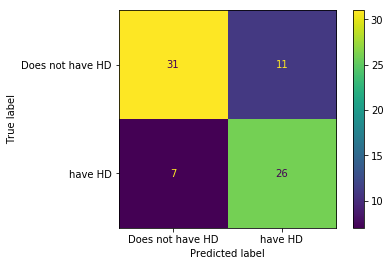

In [44]:
#plot confusion matrix
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ["Does not have HD", "have HD"])
#poor performance might be indicative of overfit

In [45]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas #extract all different values for alphas
ccp_alphas = ccp_alphas[:-1] #excludes maximum value for alphas

clf_dts = [] #create an array that will put decision trees into

#now create one decision tree per value for alpha and store it into array
for ccp_alpha in ccp_alphas :
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

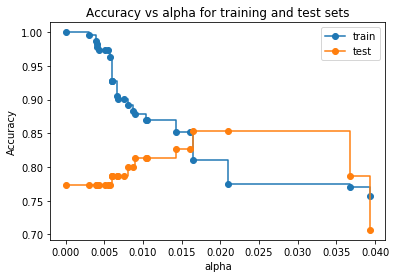

In [46]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and test sets")
ax.plot(ccp_alphas, train_scores, marker = "o", label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = "o", label = "test", drawstyle = "steps-post")
ax.legend()
plt.show() #as we increase alpha, accuracy in training set decreases but test set increases


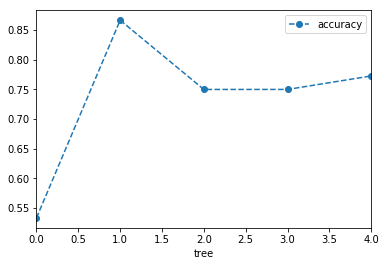

In [47]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha = 0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree':range(5), "accuracy":scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')
#bad accuracy at first tree

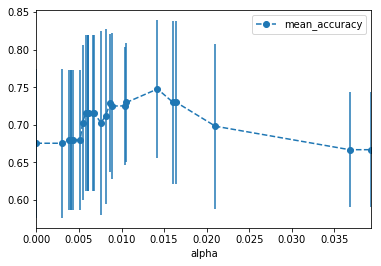

In [50]:
#the graph above shows that using different Training and Testing data with the same alpha resulted in different accuracies, suggesting that alpha is sensitive to datasets
#so instead of picking a single training dataset and single testing dataset, use cross validation to find the optimal ccp_alpha

alpha_loop_values=[]
#for each candidate value for alpha, we run 5-fold cross validation
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

In [51]:
alpha_results[(alpha_results['alpha'] > 0.014) &
             (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [52]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014) &
             (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha #series


20    0.014225
Name: alpha, dtype: float64

In [53]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

In [55]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha = ideal_ccp_alpha)
clf_df_pruned = clf_dt_pruned.fit(X_train, y_train)

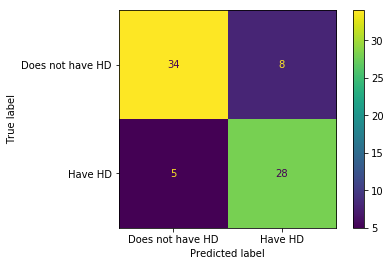

In [56]:
#This performs better than previous tree
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=["Does not have HD", "Have HD"])

In [ ]:
#tree is smaller now. If true, left. If false, right
plt.figure(figsize=(15,7.5))
#plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names = X_encoded.columns)